<a href="https://colab.research.google.com/github/idarwati/BelajarPython/blob/main/PythonMasterclass/_42_Belajar_Matematika_dan_Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jenis Analisis Statistik

1. Statistik Deksriptif
    *   Untuk mendapatkan ringkasan umum dari data yang dimiliki.
    *  Bisa dilakukan dengan membuat visualisasi data atau tabel ringkasan data.
    *  Insights and ideas.

2. Statistik Inferensial
Membuat kesimpulan dar data yang dimiliki - apakah mewakili populasi yang sesungguhnya sehingga kesimpulannya bisa digeneralisasi
    *  Conclusions and predictions

In [3]:
# mengimpor library
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set()

In [4]:
# Menentukan rataan 2 kelompok
# grup 1 = tanpa pupuk
# grup 2 = dengan pupuk
rataan1 = 50
rataan2 = 65

# Menentukan standar deviasi (variasi) -- sama untuk 2 kelompok
sd = 5

# Ukuran sampel dua kelompok
sample1 = 50
sample2 = 40

In [5]:
# Generate bilangan random
test = np.random.randn(sample1)

In [6]:
test

array([-0.79696752,  1.29495761,  1.14963989, -0.45165772,  1.14290808,
       -1.22718302, -0.14860494,  0.83187963, -0.70191669,  1.74268269,
        0.32456628,  0.31568874,  1.70533039, -2.55384414,  0.27668674,
        0.41648343, -0.2649296 ,  0.3381541 ,  1.34787659,  1.14435938,
        0.81837641,  0.26741939,  0.07103641,  0.93759375, -1.16078475,
       -0.28534276, -1.02188089,  1.81153696, -0.42738137, -1.19563498,
       -1.02201093, -0.33809482, -1.21016074, -1.47038639,  0.20565512,
       -0.54910333, -0.55390764,  1.1601354 ,  1.10807019, -0.44316266,
       -0.66970253,  0.28027106, -1.21337785, -0.64909716, -0.31493929,
       -0.58575037, -1.06007527, -0.61745334, -0.33671885, -0.5596792 ])

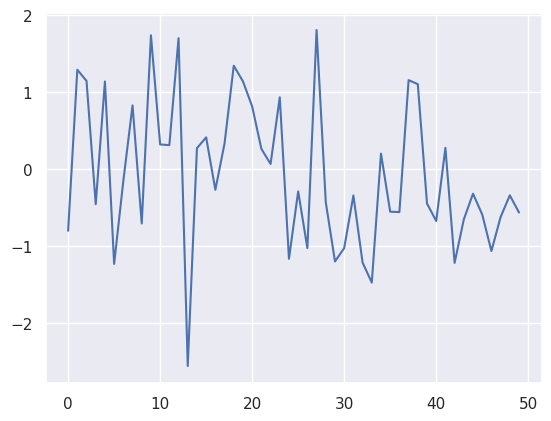

In [7]:
plt.plot(test)

<ipython-input-8-5137766>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test)


<Axes: ylabel='Density'>

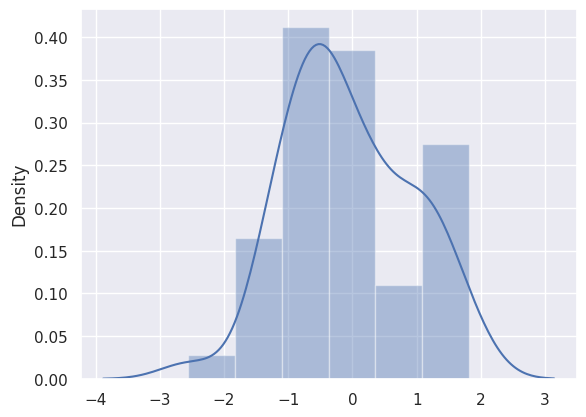

In [8]:
sns.distplot(test)

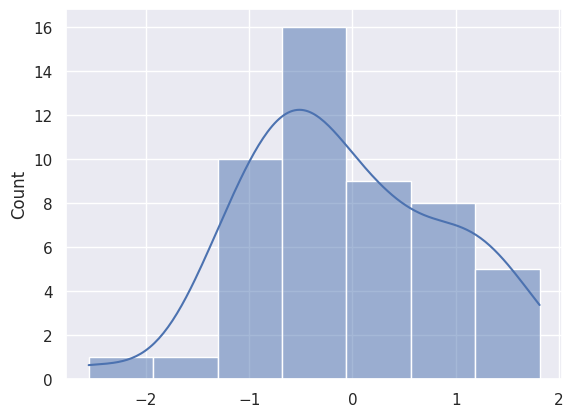

In [9]:
sns.histplot(test, kde=True)
plt.show()

In [10]:
# Generate data
data1 = np.random.normal(rataan1, sd, sample1)*sd + rataan1
data2 = np.random.normal(rataan2, sd, sample2)*sd + rataan2

In [11]:
# Menggabungkan sample size (jumlah data)
kelompok_data = [sample1, sample2]

In [12]:
batas = [np.min(np.hstack((data1, data2))), np.max(np.hstack((data1, data2)))]

In [13]:
batas

[np.float64(229.07719088336), np.float64(462.2426735457262)]

<ipython-input-14-709050417>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data1, hist=False, label='Data1')
<ipython-input-14-709050417>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data2, hist=False, label='Data2')


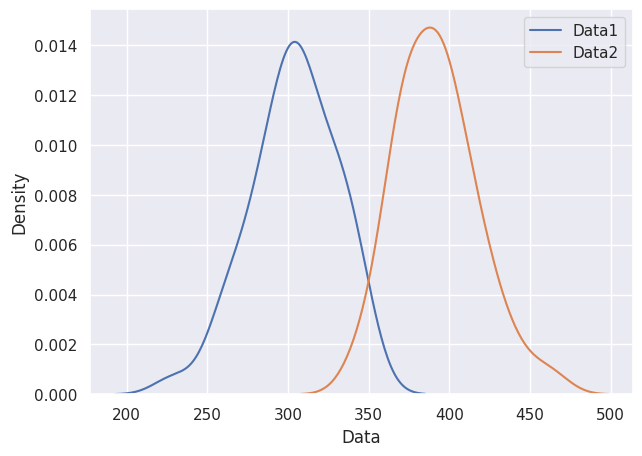

In [14]:
# Plot distribusi kedua kelompok (statistik deskriptif)
plt.figure(figsize=(7,5))

a = sns.distplot(data1, hist=False, label='Data1')
a = sns.distplot(data2, hist=False, label='Data2')

a.set(xlabel='Data', ylabel='Density')
plt.legend();

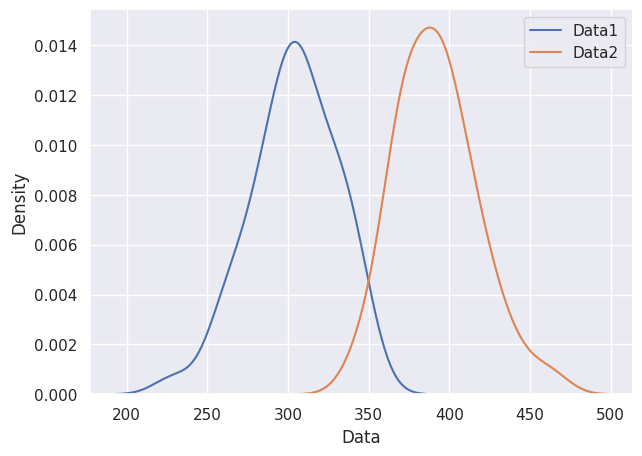

In [15]:
# Plot distribusi kedua kelompok (statistik deskriptif)
plt.figure(figsize=(7,5))
ax = plt.gca() # Get the current axes

sns.kdeplot(data1, ax=ax, label='Data1')
sns.kdeplot(data2, ax=ax, label='Data2')

ax.set(xlabel='Data', ylabel='Density')
plt.legend();

Text(0.5, 1.0, 'Data2')

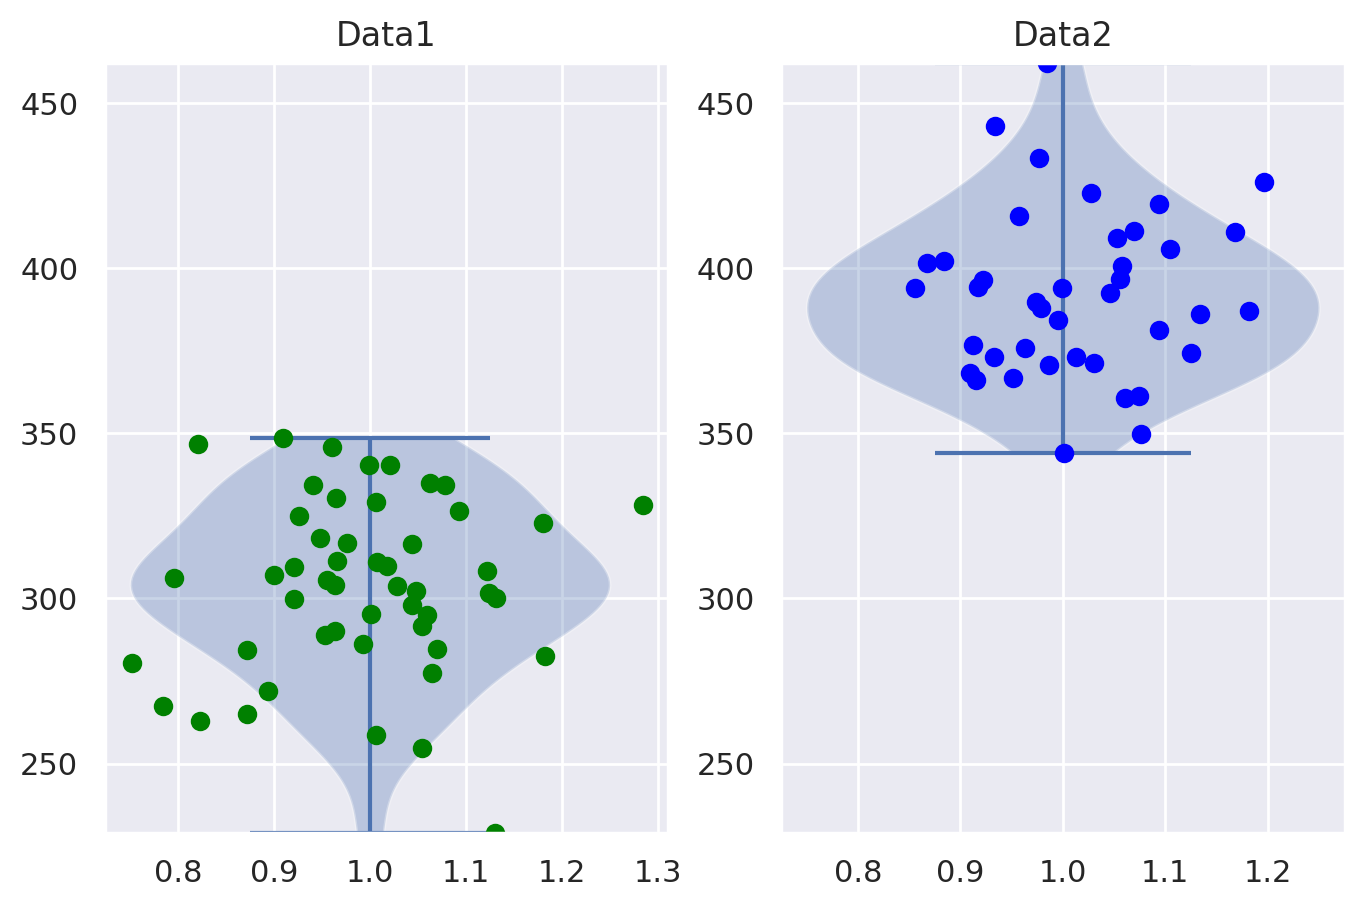

In [19]:
# Melakukan uji statistik (statistik inferensial)
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=200)

ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sample1)/10, data1, 'o', color='green')
ax[0].set_ylim(batas)
ax[0].set_title('Data1')

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sample2)/10, data2, 'o', color='blue')
ax[1].set_ylim(batas)
ax[1].set_title('Data2')

In [20]:
# Melakukan uji t-test
t,p = stats.ttest_ind(data1, data2)

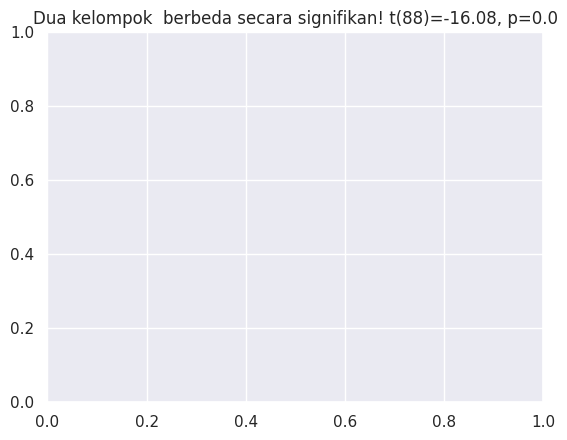

In [21]:
# Mencetak hasil t-test di judul
sigtxt = ('','Tidak')
plt.title('Dua kelompok {} berbeda secara signifikan! t({})={}, p={}'.format(sigtxt[int(p>.05)],
                                                                             sum(kelompok_data)-2,
                                                                             np.round(t,2), #ini artinya nilai t hingga dua angka dibelakang koma
                                                                             np.round(p,6))) #nilai p hingga 6 digit dibelakang koma
plt.show()

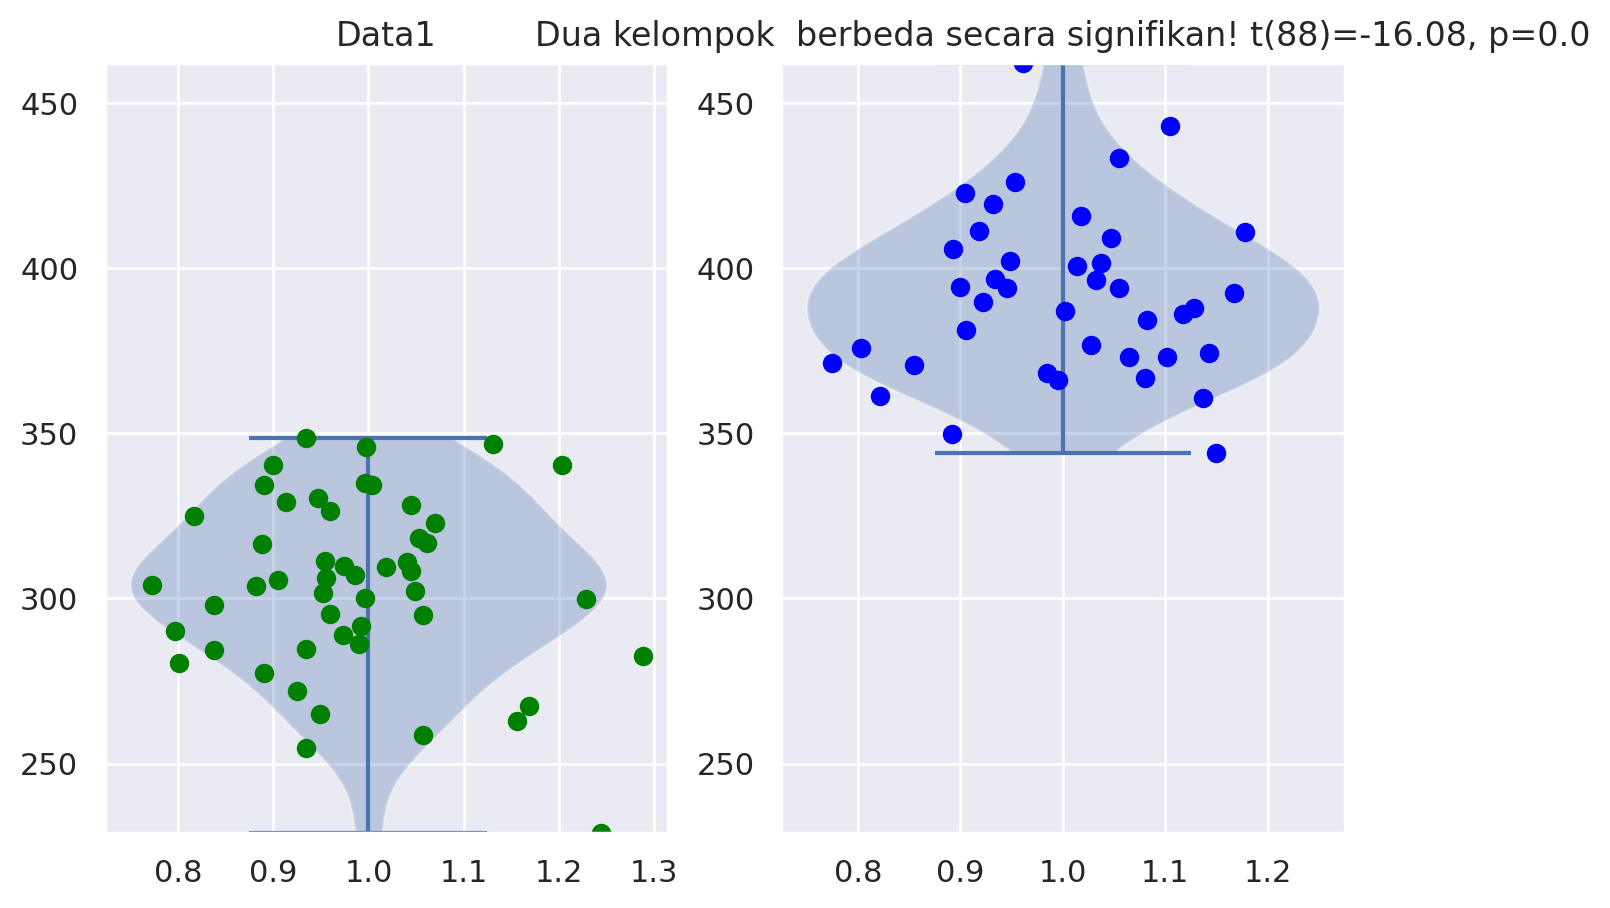

In [22]:
# Melakukan uji statistik (statistik inferensial)
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=200)

ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sample1)/10, data1, 'o', color='green')
ax[0].set_ylim(batas)
ax[0].set_title('Data1')

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sample2)/10, data2, 'o', color='blue')
ax[1].set_ylim(batas)
ax[1].set_title('Data2')

# Melakukan uji t-test
t,p = stats.ttest_ind(data1, data2)

# Mencetak hasil t-test di judul
sigtxt = ('','Tidak')
plt.title('Dua kelompok {} berbeda secara signifikan! t({})={}, p={}'.format(sigtxt[int(p>.05)],
                                                                             sum(kelompok_data)-2,
                                                                             np.round(t,2), #ini artinya nilai t hingga dua angka dibelakang koma
                                                                             np.round(p,6))) #nilai p hingga 6 digit dibelakang koma
plt.show()

In [24]:
p

np.float64(6.3383911158329465e-28)

In [ ]:
'''
Aturan umum:
Jika nilai t-test>2 atau nilai t-test<-2, maka biasanya signifikan.

# Contoh hasil tidak signifikan

In [25]:
# Menentukan rataan 2 kelompok
# grup 1 = tanpa pupuk
# grup 2 = dengan pupuk
rataan1 = 50
rataan2 = 51

# Menentukan standar deviasi (variasi) -- sama untuk 2 kelompok
sd = 5

# Ukuran sampel dua kelompok
sample1 = 50
sample2 = 40

In [26]:
# Generate bilangan random
test = np.random.randn(sample1)

In [27]:
test

array([-0.40970908, -0.86592992, -1.1855319 ,  0.45235536, -0.44802865,
       -0.49368681, -0.45525634,  1.21411383,  0.10267694, -1.25020809,
       -0.20911723,  1.75375558, -0.70963532,  1.25871355, -0.60669148,
        1.41012069, -1.52388745, -1.55131427, -0.39854087, -0.48091906,
       -0.92263275, -1.00656035, -0.58145461, -0.54247087, -0.15354603,
        0.23210731,  0.75540887,  0.84655111,  1.08069661, -0.01581127,
        0.52647243, -1.83889003, -1.8138995 , -0.73955424, -0.14109928,
       -0.52603789, -1.08332247,  0.02390194,  1.33743474, -0.42171799,
        0.69547843, -0.66281294,  1.90592013,  1.51591642, -0.37952672,
        0.41148898, -0.20365942,  0.30809999,  2.24218056,  1.3536969 ])

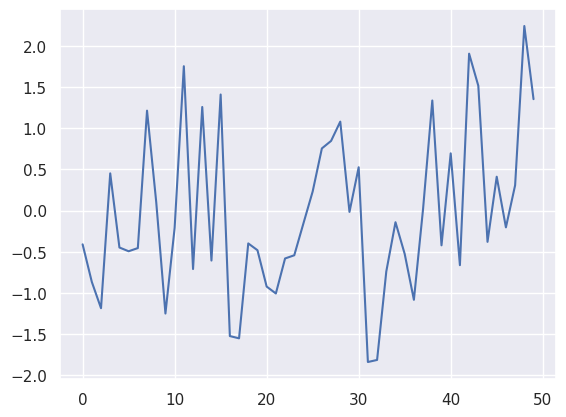

In [28]:
plt.plot(test)

<ipython-input-29-5137766>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test)


<Axes: ylabel='Density'>

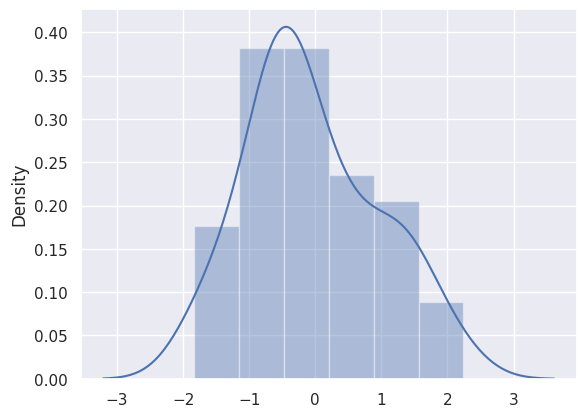

In [29]:
sns.distplot(test)

In [30]:
# Generate data
data1 = np.random.normal(rataan1, sd, sample1)*sd + rataan1
data2 = np.random.normal(rataan2, sd, sample2)*sd + rataan2

In [31]:
# Menggabungkan sample size (jumlah data)
kelompok_data = [sample1, sample2]

In [32]:
batas = [np.min(np.hstack((data1, data2))), np.max(np.hstack((data1, data2)))]

In [33]:
batas

[np.float64(254.51992547418303), np.float64(347.09697064520026)]

<ipython-input-34-709050417>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data1, hist=False, label='Data1')
<ipython-input-34-709050417>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data2, hist=False, label='Data2')


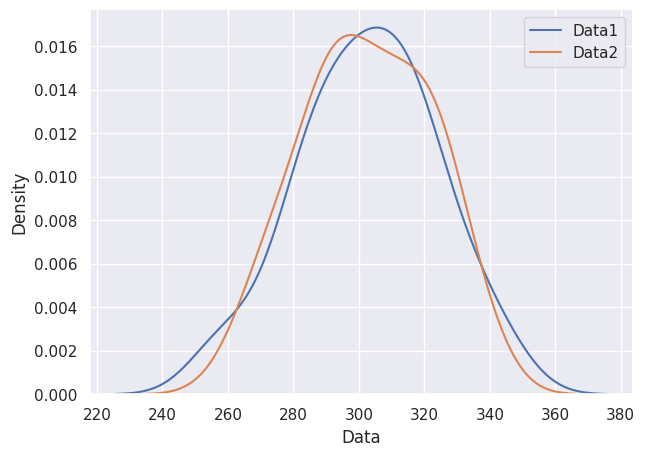

In [34]:
# Plot distribusi kedua kelompok (statistik deskriptif)
plt.figure(figsize=(7,5))

a = sns.distplot(data1, hist=False, label='Data1')
a = sns.distplot(data2, hist=False, label='Data2')

a.set(xlabel='Data', ylabel='Density')
plt.legend();

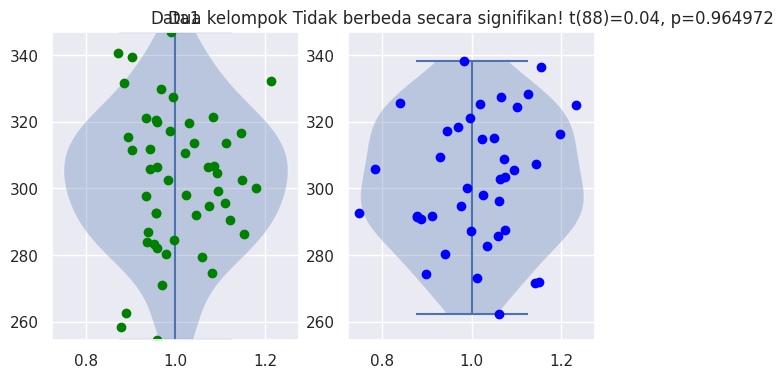

In [37]:
# Melakukan uji statistik (statistik inferensial)
fig, ax = plt.subplots(1,2, figsize=(7,4), dpi=100)

ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sample1)/10, data1, 'o', color='green')
ax[0].set_ylim(batas)
ax[0].set_title('Data1')

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sample2)/10, data2, 'o', color='blue')
ax[1].set_ylim(batas)
ax[1].set_title('Data2')

# Melakukan uji t-test
t,p = stats.ttest_ind(data1, data2)

# Mencetak hasil t-test di judul
sigtxt = ('','Tidak')
plt.title('Dua kelompok {} berbeda secara signifikan! t({})={}, p={}'.format(sigtxt[int(p>.05)],
                                                                             sum(kelompok_data)-2,
                                                                             np.round(t,2), #ini artinya nilai t hingga dua angka dibelakang koma
                                                                             np.round(p,6))) #nilai p hingga 6 digit dibelakang koma
plt.show()